In [1]:
from dataloaders import labeler_download_lot, ImageMaskDataloader
from dataloaders.io import labeler_image_mask_load_fun
import cv2
import json
import pprint as pp
import numpy as np

json_file_path = "data/20210511_seg-batch-68-2021-05-11.json"
image_folder, mask_folder  = labeler_download_lot(json_file_path, only_labels=True)

def my_load_fun(dim, maks_label_dict=None):
    lf = labeler_image_mask_load_fun(maks_label_dict=maks_label_dict)
    def f(image_mask_path):
        image, mask = lf(image_mask_path)
        image = cv2.resize(image, tuple(dim), interpolation = cv2.INTER_CUBIC)
        mask = cv2.resize(mask, tuple(dim), interpolation = cv2.INTER_NEAREST)
        return image, mask
    return f

ds = ImageMaskDataloader(image_folder, mask_folder, image_prefix="", mask_prefix="", image_suffix=".png", mask_suffix=".json",
                         image_mask_load_fun=my_load_fun((512,512)), image_mask_transform=None)

/home/mviti/miniconda3/envs/Train_py37_th1_13_cu11/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
download_lot: 100%|██████████| 39/39 [00:00<00:00, 581.98it/s]


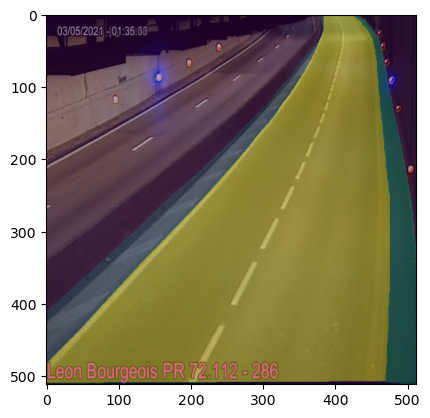

In [3]:
import matplotlib.pyplot as plt
image, mask = ds[np.random.randint(len(ds))]
plt.imshow(image)
plt.imshow(mask, alpha=0.4)

In [ ]:

from dataloaders.augmentations import 